# Bifurcations in a Radical–Balance Combustion Model

We study the ODE
$$
\frac{dY}{dt} \;=\; f(Y;\Delta,\beta)
\;=\; \Delta\,e^{\beta Y}(1-Y)\,Y \;-\; Y,
$$
where:

- $Y\ge 0$ is a non-dimensional radical concentration,
- $\Delta \ge 0$ is a Damköhler number (control/bifurcation parameter),
- $\beta>0$ measures temperature sensitivity of the reaction rate.

**Goals**

1) Find steady states and plot the bifurcation diagram $Y(\Delta)$ for $\beta<1$ and $\beta>1$.  
2) Classify the bifurcations.  
3) Analyze stability (normal-mode/linearization).

We’ll interleave short derivations with small Python snippets to visualize the results.


## Imports and helpers (run once)

We’ll keep a few helpers for the steady-state curve $\Delta(Y)$, the vector field $f(Y)$, and the linearized growth rate $f'(Y)$ evaluated on steady states.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Model definitions ---
def f(Y, Delta, beta):
    """Right-hand side dY/dt."""
    return Delta*np.exp(beta*Y)*(1.0 - Y)*Y - Y

def Delta_of_Y(Y, beta):
    """Steady-state curve: Delta(Y) = 1/[(1-Y) e^{beta Y}], valid for 0<Y<1."""
    return 1.0 / ((1.0 - Y) * np.exp(beta*Y))

def fprime_general(Y, Delta, beta):
    """Derivative f'(Y) without assuming steady state."""
    return Delta*np.exp(beta*Y) * ((1.0 - 2.0*Y) + beta*(Y - Y**2)) - 1.0

def fprime_on_branch(Y, beta):
    """
    Linear growth rate on the nonzero steady-state branch,
    using Delta*(1-Y)*exp(beta Y) = 1:
        f'(Y) = [Y*(beta*(1 - Y) - 1)]/(1 - Y).
    """
    return (Y * (beta*(1.0 - Y) - 1.0)) / (1.0 - Y)

def Dc(beta):
    """Saddle-node (turning-point) value for beta>1."""
    return beta*np.exp(1.0 - beta)


## Steady states

Steady states satisfy $f(Y)=0$, i.e.
$$
\Delta\,e^{\beta Y}(1-Y)\,Y - Y = 0
\;\;\Longrightarrow\;\;
Y=0
\quad\text{or}\quad
\Delta\,e^{\beta Y}(1-Y) = 1.
$$

Hence, for $0<Y<1$,
$$
\Delta(Y) = \frac{1}{(1-Y)e^{\beta Y}}.
$$

**Qualitative properties**

- As $Y\to 0^+$: $\Delta\to 1$.  
- As $Y\to 1^-$: denominator $\to 0^+$, so $\Delta\to+\infty$.  
- The shape depends on $\beta$ via the stationary points of $(1-Y)e^{\beta Y}$.

Let’s **plot $\Delta(Y)$** to see the shape before discussing stability.


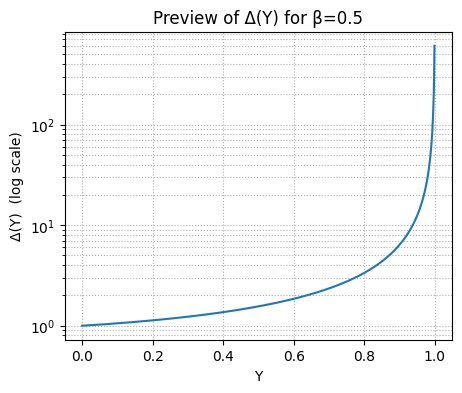

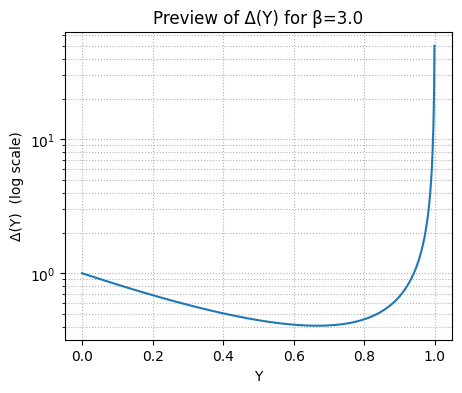

In [2]:
# Quick preview of Delta(Y) for a couple of betas
Y = np.linspace(1e-6, 0.999, 1000)
for beta in (0.5, 3.0):
    plt.figure(figsize=(5,4))
    plt.plot(Y, Delta_of_Y(Y, beta))
    plt.yscale('log')
    plt.xlabel('Y')
    plt.ylabel('Δ(Y)  (log scale)')
    plt.title(f'Preview of Δ(Y) for β={beta}')
    plt.grid(True, which='both', ls=':')
    plt.show()


## Turning point and cases β<1 vs β>1

Critical points of $\Delta(Y)$ occur where $\dfrac{d}{dY}\big[(1-Y)e^{\beta Y}\big]=0$, i.e.
$$
\beta(1-Y) = 1 \;\;\Longrightarrow\;\; Y_c = 1 - \frac{1}{\beta}.
$$

- If $\beta<1$, then $Y_c<0$ (outside the physical domain), so **no fold**: the branch is monotone.
- If $\beta>1$, then $Y_c\in(0,1)$ and there is a **saddle–node** (fold). The corresponding
$$
\Delta_c
= \frac{1}{(1-Y_c)e^{\beta Y_c}}
= \beta\,e^{\,1-\beta}.
$$

The fold separates a **lower** (small-$Y$) and an **upper** (large-$Y$) reactive branch.


## Stability analysis (normal mode)

Linearize $Y(t)=Y^\ast + \varepsilon \hat{Y} e^{\lambda t}$:
$$
\lambda = f'(Y^\ast).
$$
- If $\lambda<0$: stable; if $\lambda>0$: unstable.

For the frozen state $Y^\ast=0$:
$$
f'(0) = \Delta - 1.
$$
So $Y=0$ is **stable** for $\Delta<1$ and **unstable** for $\Delta>1$.

On the nonzero steady branch, using $\Delta e^{\beta Y}(1-Y)=1$,
$$
f'(Y) \;=\; \frac{Y\,\big(\beta(1-Y)-1\big)}{1-Y}.
$$

Because $0<Y<1$, the denominator is positive, so the sign is controlled by
$Y\big(\beta(1-Y)-1\big)$.

- If $\beta<1$, then $\beta(1-Y)-1<0$ for all $Y\in(0,1)$, hence $f'(Y)<0$:  
  the **entire reactive branch is stable**.
- If $\beta>1$, the inequality $\beta(1-Y)-1>0$ holds when $Y<1-\frac{1}{\beta}=Y_c$:  
  the **lower branch is unstable** ($f'(Y)>0$), while the **upper branch is stable** ($f'(Y)<0$).


## A small phase-line illustration (1D vector field)

For clarity, we can draw the **phase line** for representative values of $\Delta$:
- Subcritical $\Delta<\Delta_c$ (no reactive steady state if $\beta>1$),
- At the fold $\Delta=\Delta_c$,
- Supercritical $\Delta>\Delta_c$ (two reactive steady states when $\beta>1$).

This is optional but helps intuition.


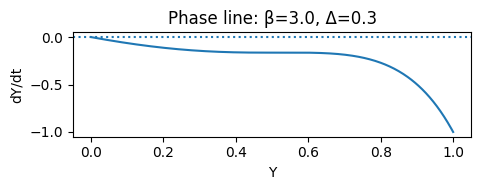

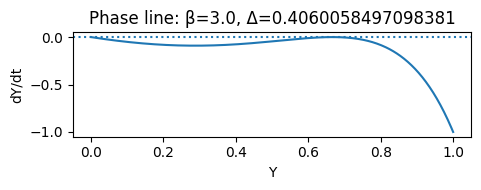

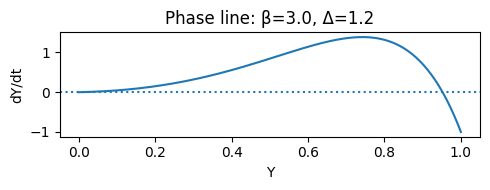

In [3]:
def phase_line(beta=3.0, Delta=0.9, Ymax=1.0, n=400):
    Y = np.linspace(0, Ymax, n)
    plt.figure(figsize=(5,2))
    plt.plot(Y, f(Y, Delta, beta))
    plt.axhline(0, ls=':')
    plt.xlabel('Y'); plt.ylabel('dY/dt')
    plt.title(f'Phase line: β={beta}, Δ={Delta}')
    plt.tight_layout()
    plt.show()

# Example: three Δ values for β=3
beta = 3.0
for D in (0.3, Dc(beta), 1.2):
    phase_line(beta=beta, Delta=D)


## Final bifurcation diagrams (what you hand in)

We now plot $Y$ vs $\Delta$ and **encode stability**:
- **Solid**: stable,
- **Dashed**: unstable,
- Include vertical guides at $\Delta=1$ (loss/gain of stability of $Y=0$),
  and, when $\beta>1$, at $\Delta_c=\beta e^{1-\beta}$ (the fold).

We produce both required cases: **β<1** and **β>1**.


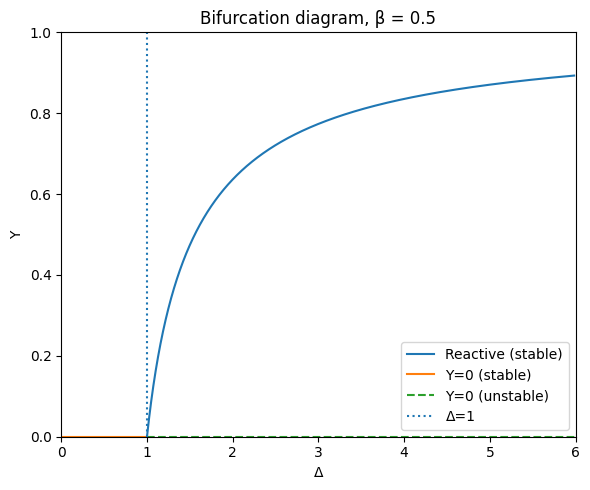

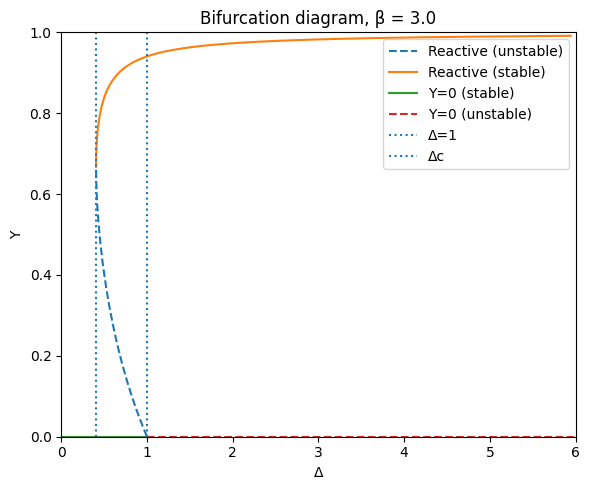

In [4]:
def plot_bifurcation(beta, dmax=6.0, n=2500):
    Y = np.linspace(1e-6, 0.999, n)
    Delta_vals = Delta_of_Y(Y, beta)

    # keep visible range
    mask = (Delta_vals <= dmax)
    Y = Y[mask]
    Delta_vals = Delta_vals[mask]

    # stability on reactive branch (sign of f' on branch)
    stable_mask = fprime_on_branch(Y, beta) < 0

    # Plot
    plt.figure(figsize=(6,5))

    # Plot reactive branch, switching style when stability changes
    def plot_segments(x, y, stable_mask, label_st='Reactive (stable)', label_un='Reactive (unstable)'):
        prev = stable_mask[0]
        start = 0
        used_st, used_un = False, False
        for i in range(1, len(stable_mask)):
            if stable_mask[i] != prev:
                segx, segy = x[start:i], y[start:i]
                if prev:
                    plt.plot(segx, segy, '-', label=None if used_st else label_st)
                    used_st = True
                else:
                    plt.plot(segx, segy, '--', label=None if used_un else label_un)
                    used_un = True
                start = i
                prev = stable_mask[i]
        # last segment
        segx, segy = x[start:], y[start:]
        if prev:
            plt.plot(segx, segy, '-', label=None if used_st else label_st)
        else:
            plt.plot(segx, segy, '--', label=None if used_un else label_un)

    plot_segments(Delta_vals, Y, stable_mask)

    # Trivial branch Y=0: stable for Δ<1, unstable for Δ>1
    dgrid = np.linspace(0, dmax, 600)
    plt.plot(dgrid[dgrid<=1], 0*dgrid[dgrid<=1], '-',  label='Y=0 (stable)')
    plt.plot(dgrid[dgrid>=1], 0*dgrid[dgrid>=1], '--', label='Y=0 (unstable)')

    # Guides
    plt.axvline(1.0, ls=':', label='Δ=1')
    if beta > 1.0:
        plt.axvline(Dc(beta), ls=':', label='Δc')

    plt.ylim(0, 1.0)
    plt.xlim(0, dmax)
    plt.xlabel('Δ')
    plt.ylabel('Y')
    plt.title(f'Bifurcation diagram, β = {beta}')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# --- Produce the two final figures ---
plot_bifurcation(beta=0.5, dmax=6.0)   # β < 1
plot_bifurcation(beta=3.0, dmax=6.0)   # β > 1


## Conclusions

- **Steady states:** $Y=0$ and the reactive branch given implicitly by $\Delta = \dfrac{1}{(1-Y)e^{\beta Y}}$.
- **Trivial state $Y=0$:** stable for $\Delta<1$, unstable for $\Delta>1$.
- **Reactive branch stability:**  
  $$
  f'(Y) = \frac{Y\,[\beta(1-Y)-1]}{1-Y}.
  $$
  - If $\beta<1$: $f'(Y)<0$ for all $Y\in(0,1)$ → single **stable** reactive branch (no hysteresis).
  - If $\beta>1$: **saddle–node** at $Y_c=1-\frac{1}{\beta}$, $\Delta_c=\beta e^{1-\beta}$.  
    Lower (small-$Y$) branch **unstable**, upper branch **stable** → ignition–extinction **bistability**.

These diagrams and phase-line sketches summarize the ignition ($\Delta$ increasing past $1$) and extinction ($\Delta$ decreasing past $\Delta_c$) behavior typical of high-temperature reacting systems.
